In [68]:
import pandas as pd
from pandas_profiling import ProfileReport

In [69]:
RANDOM_SEED = 42

In [70]:
bitrate_train = pd.read_csv('Documents/uni/Machine Learning/assignment 1/bitrate_prediction/bitrate_train.csv')
stream_quality_train = pd.read_csv('Documents/uni/Machine Learning/assignment 1/stream_quality_data/train_data.csv')

In [71]:
bitrate_train

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0
...,...,...,...,...,...,...,...,...,...,...
379016,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3324.9,52.846633,3325.0
379017,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3325.3,66.015234,3293.0
379018,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3293.2,43.355892,3317.0
379019,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3317.0,40.033319,3283.0


In [4]:
bitrate_profile = ProfileReport(bitrate_train, title="bitrate data")
bitrate_profile.to_file('bitrate_profile.html')

Summarize dataset:  62%|████████████████████████████████████████████████████████▎                                  | 13/21 [00:00<00:00, 29.90it/s, Calculate kendall correlation]/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 271.00it/s]


In [5]:
stream_quality_profile = ProfileReport(stream_quality_train, title="stream quality data")
stream_quality_profile.to_file('stream_quality_profile.html')

Summarize dataset:  65%|███████████████████████████████████████████████████████████▎                               | 15/23 [00:02<00:00,  8.81it/s, Calculate kendall correlation]/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.73it/s]


## Regression

In [6]:
bitrate_train

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0
...,...,...,...,...,...,...,...,...,...,...
379016,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3324.9,52.846633,3325.0
379017,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3325.3,66.015234,3293.0
379018,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3293.2,43.355892,3317.0
379019,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3317.0,40.033319,3283.0


In [72]:
bitrate_train.describe()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
count,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000
mean,35.231127,1.725705,49.623858,12.763672,0.180451,0.469548,1.450719,7516.585502,1603.487501,7525.396231
std,10.975010,2.505942,94.781098,112.684460,1.732890,3.157866,9.670928,6073.992189,1721.021623,6070.817736
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.800000,0.316228,14.300000,0.699206,0.000000,0.000000,0.000000,2773.300000,383.683550,2785.000000
50%,30.000000,0.942809,32.200000,1.433721,0.000000,0.000000,0.000000,6287.200000,1112.710010,6296.000000
75%,43.600000,2.233582,55.900000,4.948625,0.000000,0.000000,0.000000,10187.200000,2241.848801,10192.000000
max,125.800000,307.167273,12898.400000,40721.933293,540.000000,202.385770,640.000000,64913.500000,26908.532303,64913.000000


## Empty values

In [74]:
bitrate_train.isna().sum()

fps_mean               0
fps_std                0
rtt_mean               0
rtt_std                0
dropped_frames_mean    0
dropped_frames_std     0
dropped_frames_max     0
bitrate_mean           0
bitrate_std            0
target                 0
dtype: int64

There is 0 nan values exist.

## Data distribution
Also in this section I will remove outliers   

<AxesSubplot:>

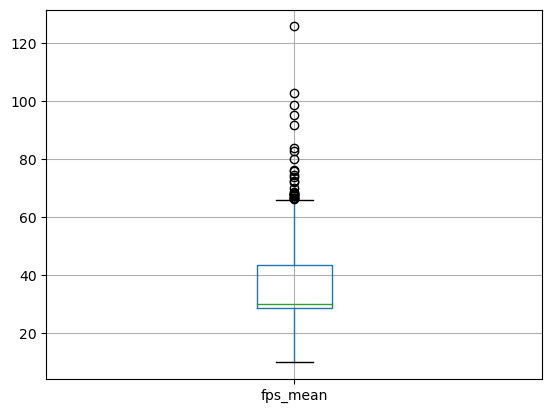

In [75]:
bitrate_train.boxplot(column='fps_mean')

In [76]:
bitrate_train = bitrate_train[bitrate_train['fps_mean'] < 65]
bitrate_train.shape

(378990, 10)

<AxesSubplot:>

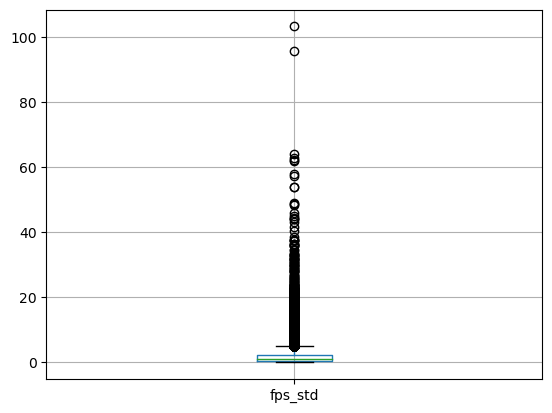

In [77]:
bitrate_train.boxplot(column='fps_std')

In [78]:
bitrate_train = bitrate_train[bitrate_train['fps_std'] < 40.0]
bitrate_train.shape

(378969, 10)

<AxesSubplot:>

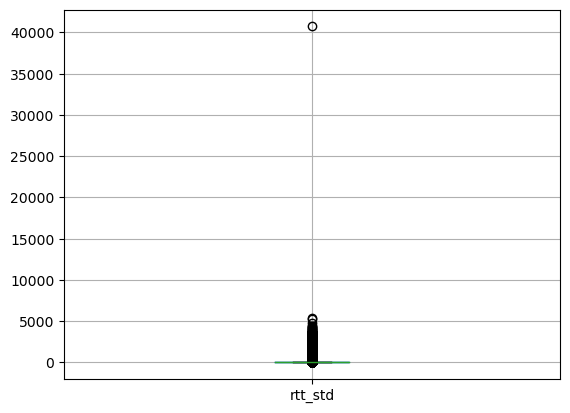

In [79]:
bitrate_train.boxplot(column='rtt_std')

In [80]:
bitrate_train = bitrate_train[bitrate_train['rtt_std'] < 500]
bitrate_train.shape

(377525, 10)

<AxesSubplot:>

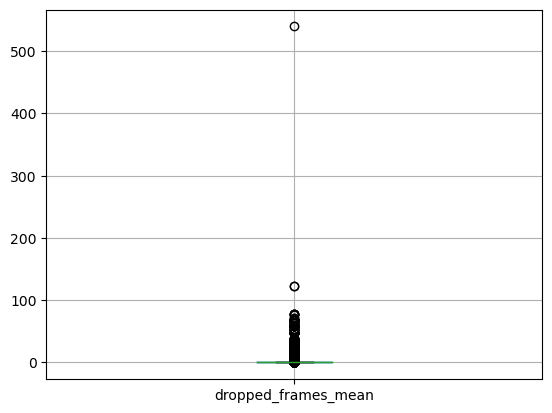

In [81]:
bitrate_train.boxplot(column='dropped_frames_mean')

In [82]:
bitrate_train = bitrate_train[bitrate_train['dropped_frames_mean'] < 100]
bitrate_train.shape

(377522, 10)

<AxesSubplot:>

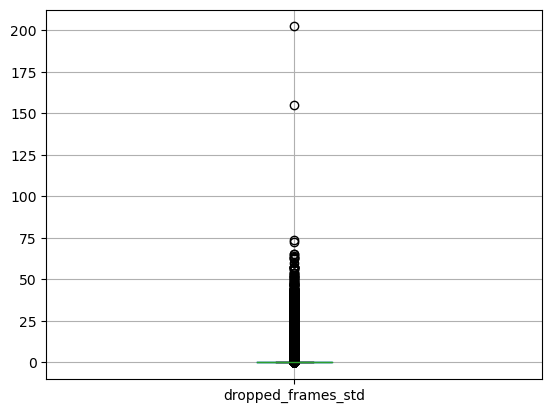

In [83]:
bitrate_train.boxplot(column='dropped_frames_std')

In [84]:
bitrate_train = bitrate_train[bitrate_train['dropped_frames_std'] < 75]
bitrate_train.shape

(377520, 10)

<AxesSubplot:>

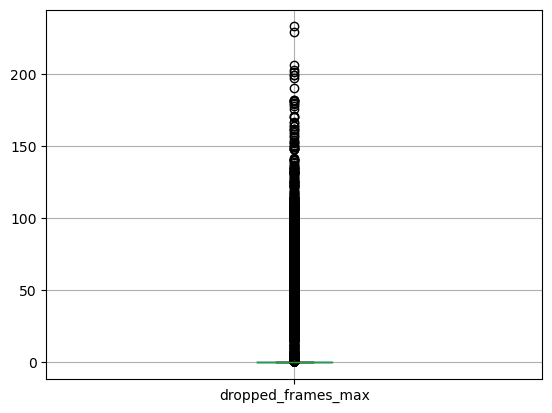

In [85]:
bitrate_train.boxplot(column='dropped_frames_max')

In [86]:
bitrate_train = bitrate_train[bitrate_train['dropped_frames_max'] < 75]
bitrate_train.shape

(376327, 10)

<AxesSubplot:>

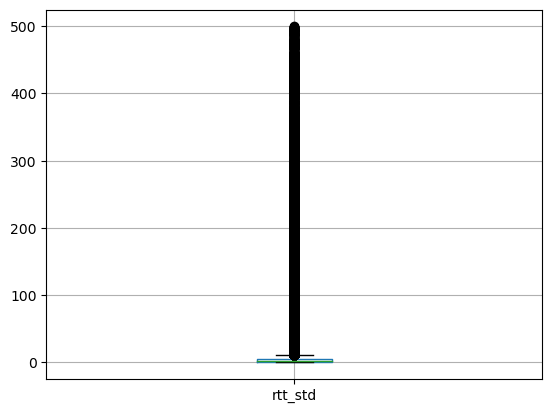

In [87]:
bitrate_train.boxplot(column='rtt_std')

In [88]:
bitrate_train = bitrate_train[bitrate_train['rtt_std'] < 300]
bitrate_train.shape

(375470, 10)

<AxesSubplot:>

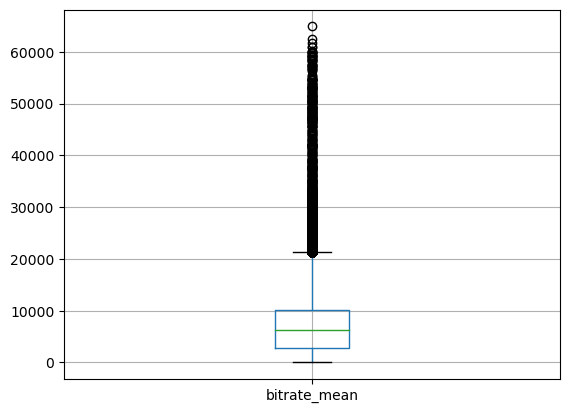

In [89]:
bitrate_train.boxplot(column='bitrate_mean')

In [90]:
bitrate_train = bitrate_train[bitrate_train['bitrate_mean'] < 30000]
bitrate_train.shape

(374628, 10)

<AxesSubplot:>

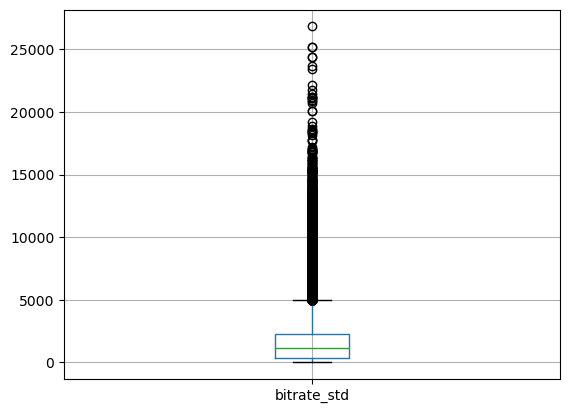

In [91]:
bitrate_train.boxplot(column='bitrate_std')

In [92]:
bitrate_train = bitrate_train[bitrate_train['bitrate_std'] < 10000]
bitrate_train.shape

(373656, 10)